NAME-ANUBHAV SAHA
IN THIS NOTEBOOK I CHOOSE TO DO THE 1st TASK
HERE SO LET'S BEGIN

In [2]:
#load the required libraries to work on
import pandas as pd #common toolkit for a Data-Scientist
import numpy as np #for mathematical tasks
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
#using SPACY for efficient text mining
#declare the object for NLP-operations
nlp = spacy.load('C:/Users/bijay/Anaconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-2.3.0')

HERE WE NOW LOAD THE PROVIDED DATA IN A DATAFRAME

In [29]:
file_loc="C:/Users/bijay/Downloads/TASK.xlsx"
main_data=pd.read_excel(file_loc,skiprows=1)
main_data1=pd.DataFrame(main_data['Introduction'])
main_data1=(main_data1['Introduction'].str.extract(r'((?P<Drug_name>[A-Za-z0-9|\s]*)(?P<Drug_Type>(?:Tablet|Gel|Solution|Capsule|Inhaler|Syrup|Cream|Liquid|Suspension|Kit|Injection|Lotion|Drops|Expectorant|Emulsion|Spray)))'))

FOR EFFICEINT SUMMARIZATION WE EXTRACT THE DRUG NAME AND ITS TYPE USING REGULAR EXPRESSIONS

In [97]:
#here we have extracted the drug_name and type from the dataset as you can see in the table below
main_data1.rename(columns={0:'Full_name'},inplace=True)
main_data1.drop(columns='Drug_name')

,Full_name,Drug_Type
0,Acnesol Gel,Gel
1,Ambrodil Syrup,Syrup
2,Augmentin 625 Duo Tablet,Tablet
3,Azithral 500 Tablet,Tablet
4,Alkasol Oral Solution,Solution
...,...,...
995,Azapure Tablet,Tablet
996,Arimidex 1mg Tablet,Tablet
997,Arpimune ME 100mg Capsule,Capsule
998,Amlodac CH Tablet,Tablet


NOW LETS START WORKING TOWARDS THE BUILDING OF THE TEXT SUMMARIZER

In [98]:
def text_summarizer(raw_docx):
    raw_text = raw_docx
    docx = nlp(raw_text)
    stopwords = list(STOP_WORDS)
    # Build Word Frequency
# word.text is tokenization in spacy
    word_frequencies = {}  
    for word in docx:  
        if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
    # Sentence Tokens
    sentence_list = [ sentence for sentence in docx.sents ]

    # Calculate Sentence Score and Ranking
    sentence_scores = {}  
    for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

    # Find N Largest
    from heapq import nlargest
    summary_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)
    final_sentences = [ w.text for w in summary_sentences ]
    summary = ' '.join(final_sentences)
    return summary

In [99]:
#run the summarization function throughout the dataset
f_summary=[]
for i in range(0,1000):
    f_summary.append(text_summarizer(main_data['Introduction'][i]))
    i=i+1

In [159]:
main_data1['Other_Details_summary']=f_summary
main_data1.rename(columns={'Other_Details':'Other_Details_summary'},inplace=True)
df=main_data1.dropna()#remove junk data from the database
df.to_csv('Result.csv')

In [160]:
#our work is finished lets have a look at our finished DataFrame
df

,Full_name,Drug_Type,Other_Details_summary
0,Acnesol Gel,Gel,"Common side effects like minor itching, burnin..."
1,Ambrodil Syrup,Syrup,"Before taking this medicine, tell your doctor ..."
2,Augmentin 625 Duo Tablet,Tablet,It is used to treat infections of the lungs (e...
3,Azithral 500 Tablet,Tablet,Tablet is an antibiotic used to treat various ...
4,Alkasol Oral Solution,Solution,"To make sure the medicine is safe for you, bef..."
...,...,...,...
995,Azapure Tablet,Tablet,"Swallow it as a whole, do not crush, chew, br..."
996,Arimidex 1mg Tablet,Tablet,The most common side effects of the medicine i...
997,Arpimune ME 100mg Capsule,Capsule,The most common side effects of this medicine ...
998,Amlodac CH Tablet,Tablet,"You should have your blood pressure, kidney fu..."


In [161]:
#lets take the example of 1 paragraph and see how our data is analysed
df['Other_Details_summary'][0]#1st summary in the dataset..shown as a example

'Common side effects like minor itching, burning, or redness of the skin and oily skin may be seen in some people. Also, inform the doctor if you have ever had bloody diarrhea caused by taking antibiotics or if you are using any other medicines to treat skin conditions. It is used to treat acne, which appears as spots or pimples on your face, chest or back. It is a safe medicine, but you should inform your doctor if you have any problems with your bowels (intestines). Avoid any contact with your eyes, nose, or mouth. It may take several weeks for your symptoms to improve, but you should keep using this medicine regularly. You should normally wash and dry the affected area before applying a thin layer of the medicine.'

In [156]:
#now lets do some data visualization
#lets have a look at the types of medicine available
print("THE TYPES OF MEDICINE AVAILABLE IN THE DATA SET----->")
type_medicine=df['Drug_Type'].unique()
for i in type_medicine:
    print(i)

THE TYPES OF MEDICINE AVAILABLE IN THE DATA SET----->
Gel
Syrup
Tablet
Solution
Capsule
Cream
Kit
Suspension
Inhaler
Liquid
Expectorant
Injection
Lotion
Drops
Emulsion
Spray


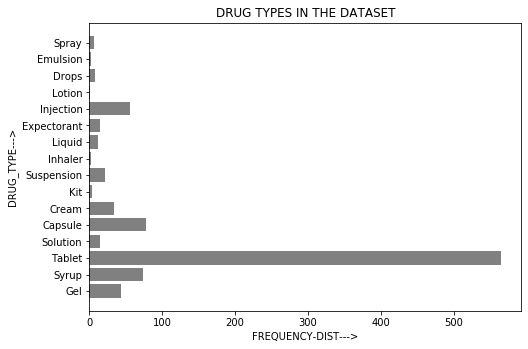

In [209]:
#also lets understand it better with the help of a bar-graph
#lets get the frequency of each type of the drug
freq_dist=[]
for i in type_medicine:
    freq_dist.append(df[df['Drug_Type']==i].count()[1])
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.barh(type_medicine,freq_dist,color="grey")
plt.xlabel('FREQUENCY-DIST--->')
plt.ylabel('DRUG_TYPE--->')
plt.title('DRUG TYPES IN THE DATASET')
plt.show()